#### Predicting Garment Employee Productivity: An End-to-End ML Project

Using machine learning, the aim of this project is to build a regression model to predict 'actual_productivity' based on variables such as the number of workers, the number of style changes, overtime hours, and incentives, among others. By analyzing the relationships between these factors and the actual output, the model aims to accurately forecast productivity levels, which could then be used to optimize workforce management and production planning.

In [1]:
## Python 3.7 version
import sys
assert sys.version_info >= (3, 7)

## Scikit-Learn ≥ 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Data Importation

In [2]:
import pandas as pd

file_path = "C:/Users/mehri/Downloads/productivity.csv" 

# Load the dataset into a pandas DataFrame
productivity = pd.read_csv(file_path)

# Display the first few rows of the dataframe to confirm it's loaded correctly
productivity.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
# Summary Statistics
print("Summary Statistics:")

# Using the .describe() method on the 'productivity' DataFrame
productivity.describe()

Summary Statistics:


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
productivity["over_time"].value_counts()

960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: over_time, Length: 143, dtype: int64

In [6]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

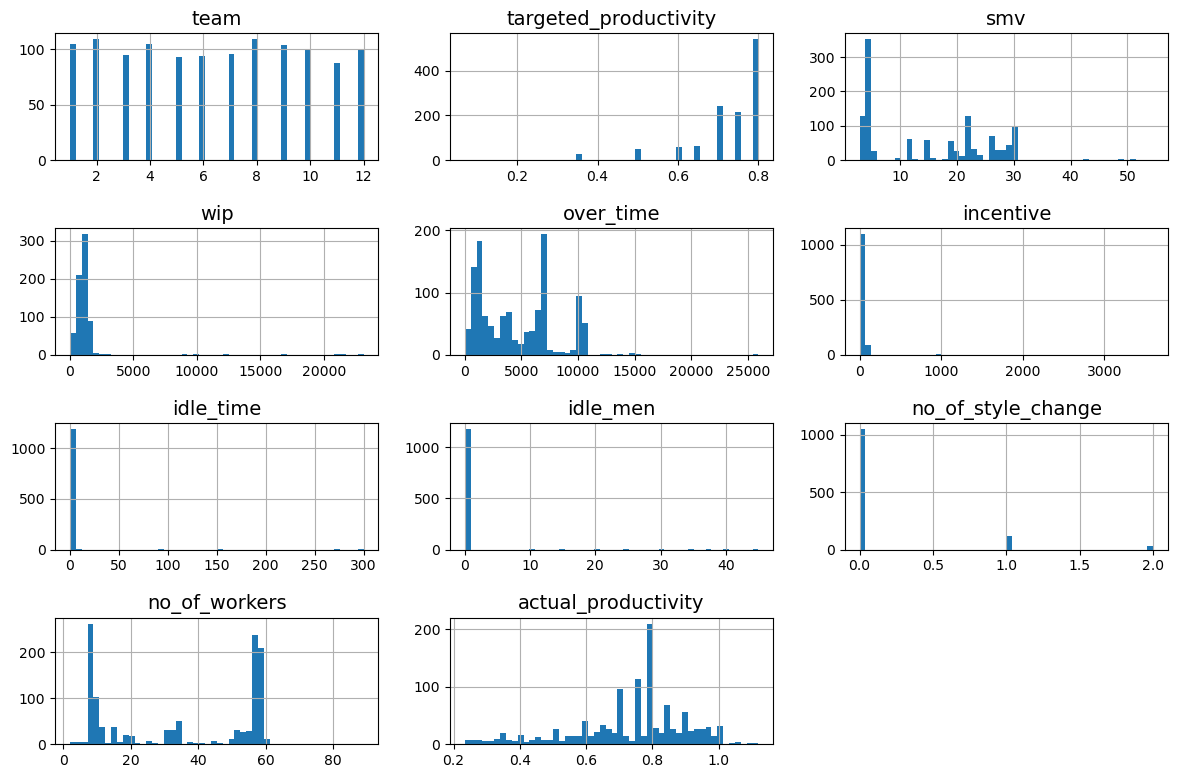

In [7]:
import matplotlib.pyplot as plt

# Setting default font sizes for various plot elements
plt.rc('font', size=14)        # Default font size for all text
plt.rc('axes', labelsize=14, titlesize=14)  # Font size for axes labels and titles
plt.rc('legend', fontsize=14)  # Font size for legend
plt.rc('xtick', labelsize=10)  # Font size for x-axis tick labels
plt.rc('ytick', labelsize=10)  # Font size for y-axis tick labels

# Creating histograms for each numerical column in the 'productivity' DataFrame
productivity.hist(bins=50, figsize=(12, 8))

# Saving the histogram plots to a file named "attribute_histogram_plots"
save_fig("attribute_histogram_plots")

# Displaying the histograms
plt.show()

## Test Set Creation

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(productivity, 0.2)
len(train_set)

958

In [10]:
len(test_set)

239

In [11]:
np.random.seed(42)

In [12]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    # Check if the identifier is NaN and return False if it is
    if pd.isnull(identifier):
        return False
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
productivity_with_id = productivity.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(productivity_with_id, 0.2, "index")

In [14]:
from sklearn.model_selection import train_test_split

# Before creating the 'id' column, fill NaN values in 'incentive' and 'wip' columns with 0 or an appropriate value
productivity['incentive'].fillna(0, inplace=True)
productivity['wip'].fillna(0, inplace=True)

# Now you can split the data using train_test_split with stratification on a relevant categorical feature
# Ensure that 'department' or 'day' or any other relevant feature is not null
productivity = productivity.dropna(subset=['department'])

# Convert 'department' to a categorical variable for stratification
productivity['department'] = productivity['department'].astype('category')

In [15]:
# Stratify based on 'department' to ensure that the training and test sets have similar distributions of the department category
train_set, test_set = train_test_split(productivity, test_size=0.2, random_state=42, stratify=productivity['department'])

In [16]:
# Assuming 'test_set' is the test set derived from the productivity dataset
# Checking for missing values 
missing_values_workers = test_set["no_of_workers"].isnull().sum()
print(f"Missing '# of workers' values in test set: {missing_values_workers}")

# Check for missing values in 'wip' column
missing_values_wip = test_set["wip"].isnull().sum()
print(f"Missing 'wip' values in test set: {missing_values_wip}")

# Check for missing values in 'incentive' column
missing_values_incentive = test_set["incentive"].isnull().sum()
print(f"Missing 'incentive' values in test set: {missing_values_incentive}")

Missing '# of workers' values in test set: 0
Missing 'wip' values in test set: 0
Missing 'incentive' values in test set: 0


Number of NaN values in 'team' column: 0


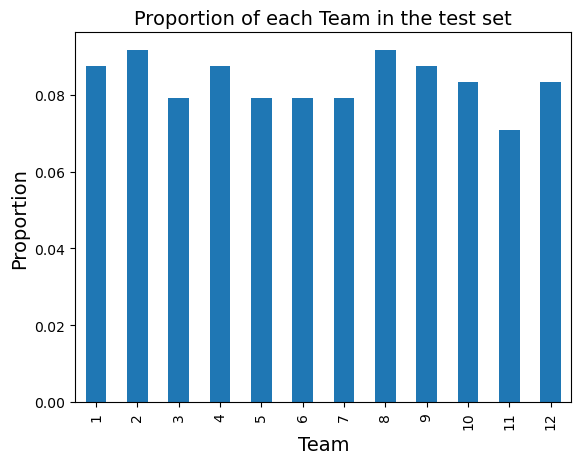

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

nan_count = productivity['team'].isna().sum()
print("Number of NaN values in 'team' column:", nan_count)

productivity.dropna(subset=['team'], inplace=True)

# Perform stratified split based on 'team'.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(productivity, productivity['team']):
    strat_train_set = productivity.loc[train_index]
    strat_test_set = productivity.loc[test_index]

# Calculate the value counts for plotting before dropping the 'team' column.
team_proportions = strat_test_set['team'].value_counts(normalize=True)

# Remove 'team' so the data is back to its original state.
for set_ in (strat_train_set, strat_test_set):
    set_.drop('team', axis=1, inplace=True)

# Create a figure and axis for plotting.
fig, ax = plt.subplots()

# Plotting the proportion of each team in the test set.
team_proportions.sort_index().plot.bar(ax=ax)
ax.set_title('Proportion of each Team in the test set')
ax.set_xlabel('Team')
ax.set_ylabel('Proportion')

# Display the figure.
plt.show()

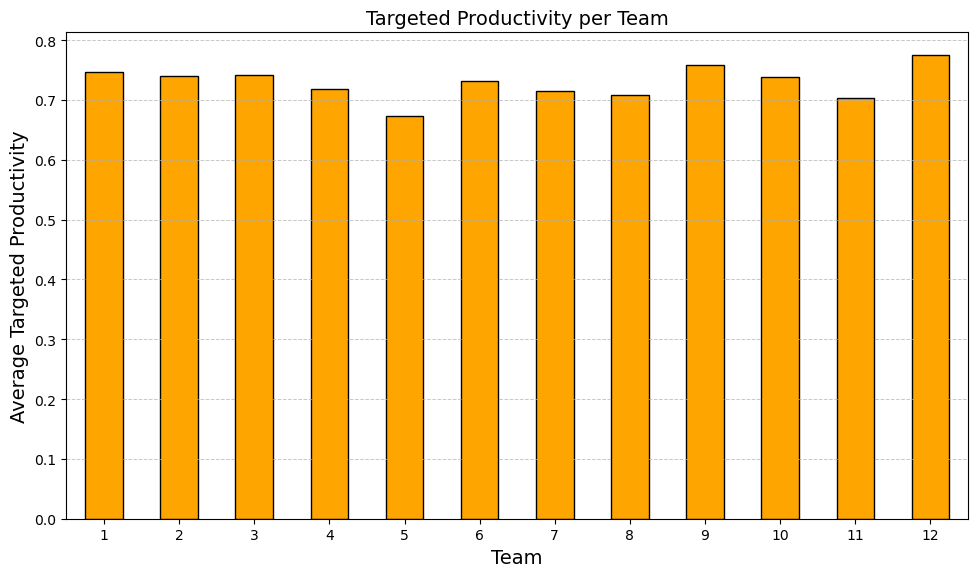

In [18]:
# Calculating the mean 'targeted_productivity' for each 'team'
mean_productivity_per_quarter = productivity.groupby('team')['targeted_productivity'].mean().sort_index()

# Plotting the results
plt.figure(figsize=(10, 6))

# Creating a bar plot of the average 'targeted_productivity' per 'team'
mean_productivity_per_quarter.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Targeted Productivity per Team')
plt.xlabel('Team')
plt.ylabel('Average Targeted Productivity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(productivity, productivity["team"]):
    strat_train_set_n = productivity.iloc[train_index]
    strat_test_set_n = productivity.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [20]:
strat_train_set, strat_test_set = strat_splits[0]

In [21]:
strat_train_set, strat_test_set = train_test_split(
    productivity, test_size=0.2, stratify= productivity["team"], random_state=42)

In [22]:
strat_test_set["team"].value_counts() / len(strat_test_set)

2     0.091667
8     0.091667
9     0.087500
4     0.087500
1     0.087500
10    0.083333
12    0.083333
3     0.079167
6     0.079167
7     0.079167
5     0.079167
11    0.070833
Name: team, dtype: float64

In [23]:
##### extra code - rename it

def income_cat_proportions(data):
    return data["team"].value_counts() / len(data)

train_set, test_set = train_test_split(productivity, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(productivity),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,8.77,8.75,10.42,-0.25,18.75
2,9.11,9.17,5.83,0.67,-35.94
3,7.94,7.92,5.83,-0.25,-26.50
4,8.77,8.75,7.50,-0.25,-14.50
5,7.77,7.92,9.17,1.90,17.98
6,7.85,7.92,7.92,0.81,0.81
7,8.02,7.92,6.67,-1.29,-16.87
8,9.11,9.17,9.58,0.67,5.24
9,8.69,8.75,9.58,0.71,10.30


In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("team", axis=1, inplace=True)

## Data Insights Discovery & Visualization

In [144]:
# Creating a copy of the stratified training set
# 'strat_train_set' is assumed to be a DataFrame created during a stratified sampling process
productivity = strat_train_set.copy()

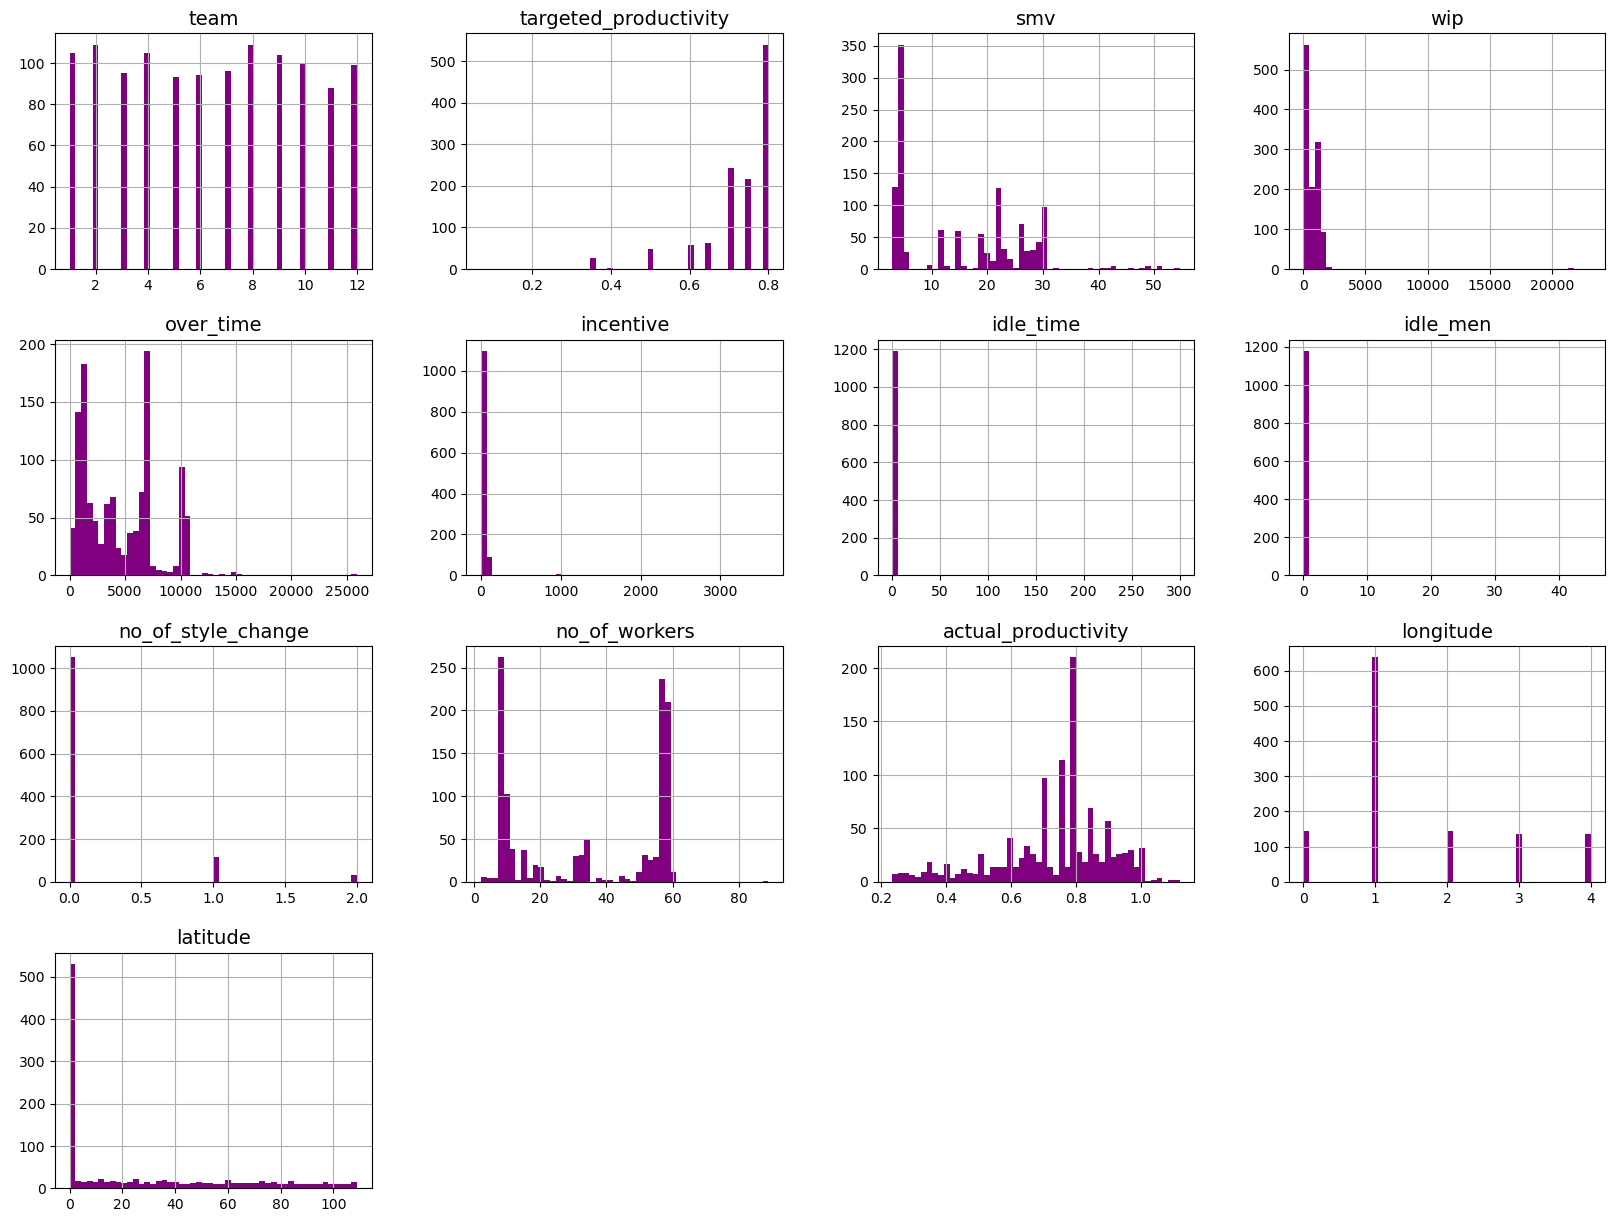

In [102]:
# Data Distribution Visualization
# Creating histograms to visualize the distribution of numerical features in the 'productivity' DataFrame

# Selecting numerical attributes from the DataFrame
# 'select_dtypes' filters the columns in the DataFrame to include only numerical data types
num_attributes = productivity.select_dtypes(include=[np.number])

# Plotting histograms for all numerical attributes
# 'bins=50' sets the number of bins in each histogram to 50
# 'figsize=(20,15)' adjusts the size of the figure to ensure clarity and readability
# 'color='green'' sets a custom color for all histograms to differentiate from the default blue
num_attributes.hist(bins=50, figsize=(20,15), color='purple')

# Displaying the histograms
# This provides insights into the distribution, skewness, and potential outliers of each numerical feature
plt.show()

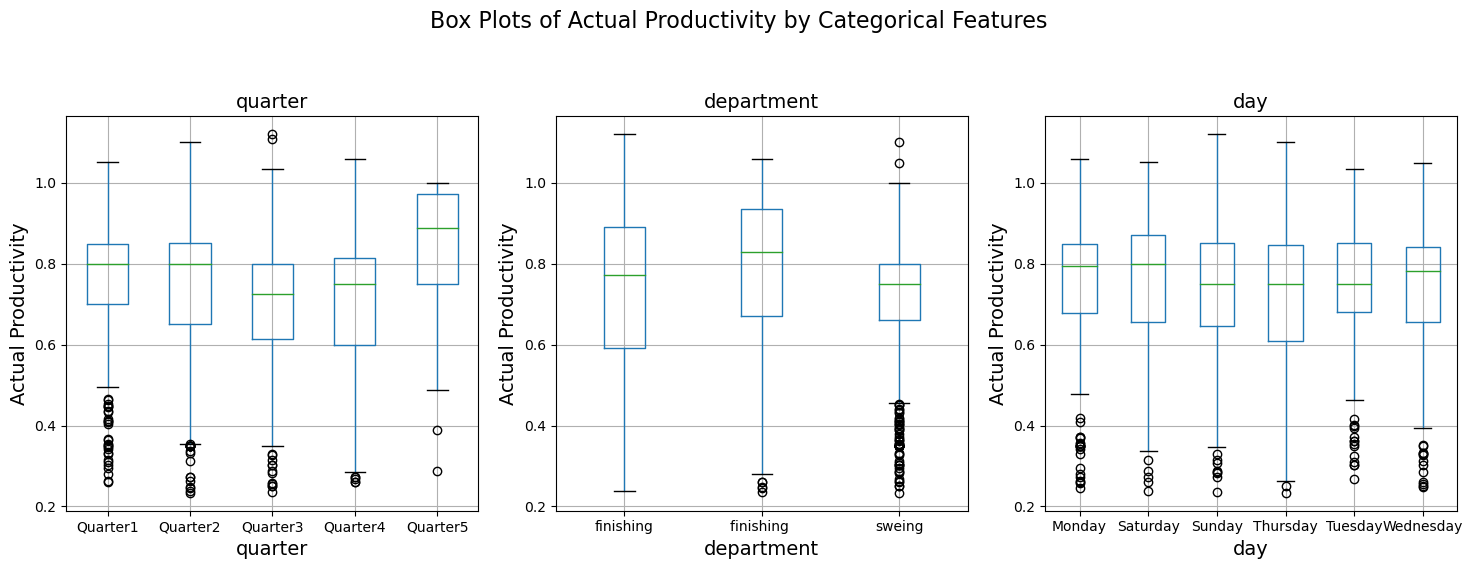

In [113]:
# Assuming 'productivity_data' contains the loaded productivity dataset with categorical and 'actual_productivity' columns
import matplotlib.pyplot as plt

# Selecting categorical features
cat_attributes = productivity.select_dtypes(include=['object']).columns

# Define the number of subplots based on the number of categorical features
n_cat_attributes = len(cat_attributes)
fig, axes = plt.subplots(1, n_cat_attributes, figsize=(5 * n_cat_attributes, 6))  # Adjust the figure size as needed

# Create a box plot for each categorical feature
for i, col in enumerate(cat_attributes):
    productivity.boxplot(column='actual_productivity', by=col, ax=axes[i], figsize=(5, 6))
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Actual Productivity')
    # Remove the automatic title that Pandas gives
    plt.suptitle('')

# Set overall title and show the plots
fig.suptitle('Box Plots of Actual Productivity by Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the overall title
plt.show()

Correlation Matrix:
actual_productivity      1.000000
targeted_productivity    0.421594
incentive                0.076538
wip                      0.047389
longitude               -0.015864
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
latitude                -0.110817
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


C:\Users\mehri\AppData\Local\Temp\ipykernel_12092\3446296781.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = productivity.corr()


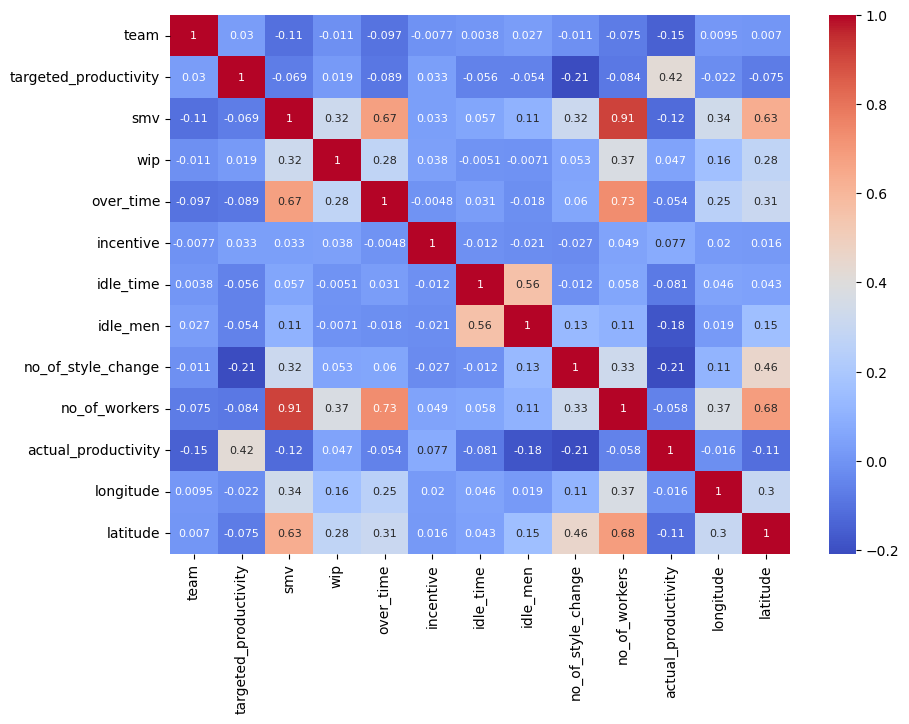

In [96]:
# Importing the seaborn library for advanced data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
# Printing a heading for clarity
print("Correlation Matrix:")

# Calculating the correlation matrix for the 'productivity' DataFrame
# This matrix shows the correlation coefficients between each pair of variables
correlation_matrix = productivity.corr()

# Printing the correlation values of 'actual_productivity' with other features, sorted in descending order
# This helps in identifying which features have the strongest positive or negative correlation with 'actual_productivity'
print(correlation_matrix['actual_productivity'].sort_values(ascending=False))

# Creating a heatmap to visualize the correlation matrix
# Adjusting the figure size to be slightly smaller for better display
plt.figure(figsize=(10, 7))  # Decreased size from (12, 8) to (10, 7)

# Plotting the heatmap with annotations
# 'annot=True' displays the correlation coefficients on the heatmap
# 'annot_kws={"size": 8}' reduces the font size of the annotations to make them smaller
# 'cmap='coolwarm'' sets the color scheme to visually distinguish different levels of correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})

# Displaying the heatmap
# This visual representation helps in quickly understanding the strength and direction of relationships between variables
plt.show()

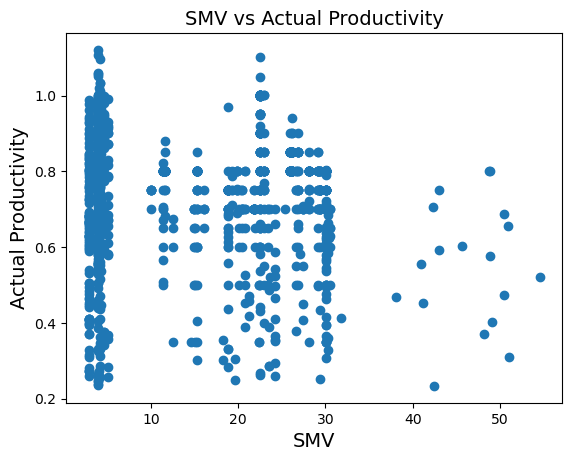

In [94]:
# Feature Relationships Analysis
# Creating a scatter plot to explore the relationship between 'smv' and 'actual_productivity'
# 'smv' represents a specific feature (e.g., Standard Minute Value) in the 'productivity' DataFrame

# Plotting 'smv' on the x-axis and 'actual_productivity' on the y-axis
plt.scatter(productivity['smv'], productivity['actual_productivity'])

# Labeling the x-axis as 'SMV'
plt.xlabel('SMV')

# Labeling the y-axis as 'Actual Productivity'
plt.ylabel('Actual Productivity')

# Setting the title of the scatter plot to 'SMV vs Actual Productivity'
# This title helps in identifying the plotted features at a glance
plt.title('SMV vs Actual Productivity')

# Displaying the scatter plot
# This visual representation helps in understanding the correlation between 'smv' and 'actual_productivity'
plt.show()

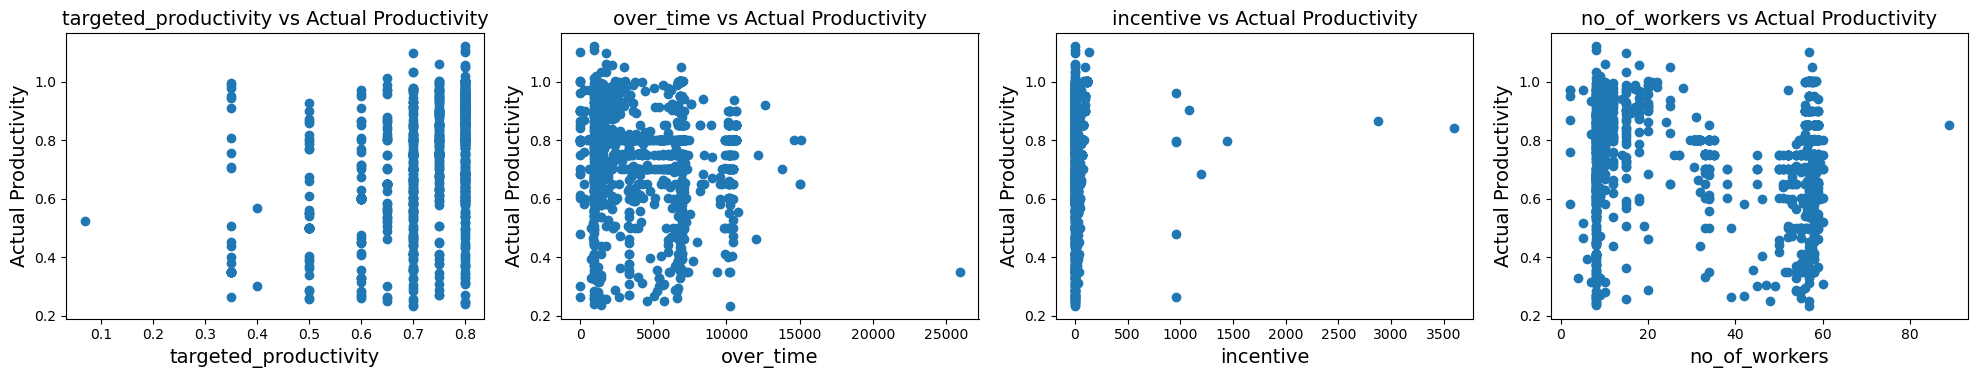

In [93]:
# Replace 'feature_name' with the actual names of the numerical features you're interested in
numerical_features = ['targeted_productivity', 'over_time', 'incentive', 'no_of_workers']  # Example features

# Define the number of subplots based on the number of numerical features
n_features = len(numerical_features)
# Creating a figure with a row of subplots, one for each numerical feature
# Adjusting the figure size dynamically based on the number of features
fig, axes = plt.subplots(1, n_features, figsize=(5 * n_features, 4)) 

# Iterate over the enumerated numerical features
for i, feature in enumerate(numerical_features):
    # Creating a scatter plot for each feature against 'actual_productivity'
    axes[i].scatter(productivity[feature], productivity['actual_productivity'])
    # Setting the x-axis label to the feature name
    axes[i].set_xlabel(feature)
    # Setting the y-axis label to 'Actual Productivity'
    axes[i].set_ylabel('Actual Productivity')
    # Setting the title of each subplot to show the feature it represents
    axes[i].set_title(f'{feature} vs Actual Productivity')

# Adjusting the layout so that the subplots do not overlap
plt.tight_layout()
# Displaying the figure with all subplots
plt.show()

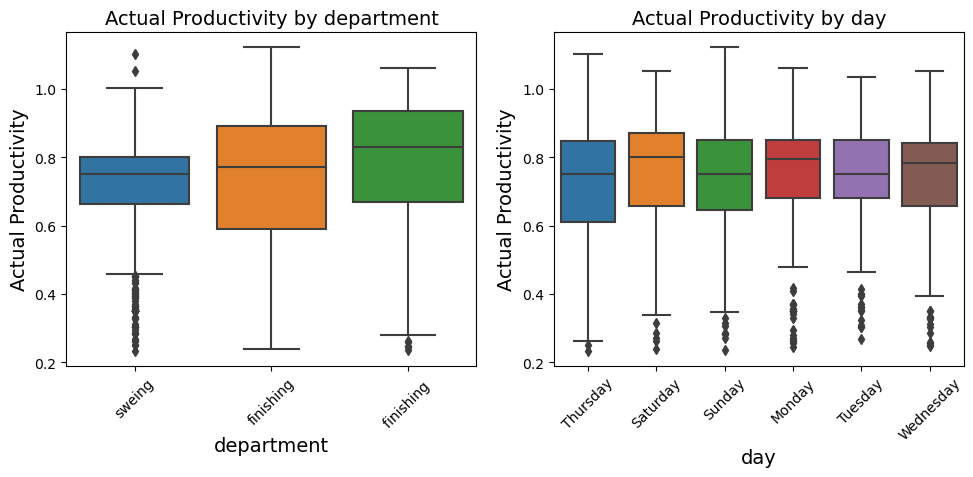

In [92]:
import seaborn as sns

# Assuming 'productivity' is a DataFrame loaded with data from 'productivity.csv'
# Example of loading the DataFrame:
# productivity = pd.read_csv('path_to_your_csv_file')

# Specifying a list of categorical features of interest
categorical_features = ['department', 'day']  # Replace with actual categorical feature names

# Determine the number of features to plot
n_features = len(categorical_features)

# Creating a subplot grid with 1 row and 'n_features' columns
fig, axes = plt.subplots(1, n_features, figsize=(n_features * 5, 5))  # Adjust figsize as needed

# Looping through each categorical feature and its corresponding axis
for i, feature in enumerate(categorical_features):
    # Checking if the current feature exists in the DataFrame columns
    if feature in productivity.columns:
        # Creating a boxplot for each feature on its corresponding axis
        sns.boxplot(x=feature, y='actual_productivity', data=productivity, ax=axes[i])
        axes[i].set_xlabel(feature)  # Setting the label for the x-axis
        axes[i].set_ylabel('Actual Productivity')  # Setting the label for the y-axis
        axes[i].set_title(f'Actual Productivity by {feature}')  # Setting the title of the plot
        axes[i].tick_params(axis='x', rotation=45)  # Rotating x-axis labels for readability
    else:
        print(f"The feature '{feature}' is not in the DataFrame columns.")

plt.tight_layout()  # Adjust layout for better fit
plt.show()  # Displaying the plots side by side

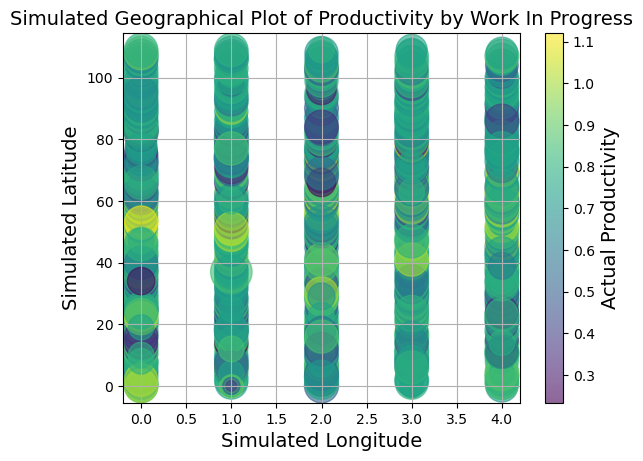

In [86]:
# Generating simulated geographic coordinates for each unique 'wip' value in the 'productivity' DataFrame
unique_wip = productivity['wip'].dropna().unique()
wip_to_coord = {wip: (i % 5, i // 5) for i, wip in enumerate(unique_wip)}

# Mapping 'wip' values to these simulated coordinates to create 'longitude' and 'latitude' columns
productivity['longitude'] = productivity['wip'].map(lambda x: wip_to_coord.get(x, (np.nan, np.nan))[0], na_action='ignore')
productivity['latitude'] = productivity['wip'].map(lambda x: wip_to_coord.get(x, (np.nan, np.nan))[1], na_action='ignore')

# Removing rows where 'longitude' or 'latitude' are NaN
productivity.dropna(subset=['longitude', 'latitude'], inplace=True)

# Scaling point sizes in the plot according to the 'no_of_workers' feature
point_sizes = productivity['no_of_workers'].fillna(0) * 10

# Plotting the data using the simulated 'longitude' and 'latitude', sizing points by 'no_of_workers'
# and coloring them based on 'actual_productivity'
plt.scatter(productivity['longitude'], productivity['latitude'], 
            alpha=0.6, s=point_sizes, c=productivity['actual_productivity'], cmap='viridis')
plt.colorbar(label='Actual Productivity')
plt.xlabel('Simulated Longitude')
plt.ylabel('Simulated Latitude')
plt.title('Simulated Geographical Plot of Productivity by Work In Progress')
plt.grid(True)
plt.show()

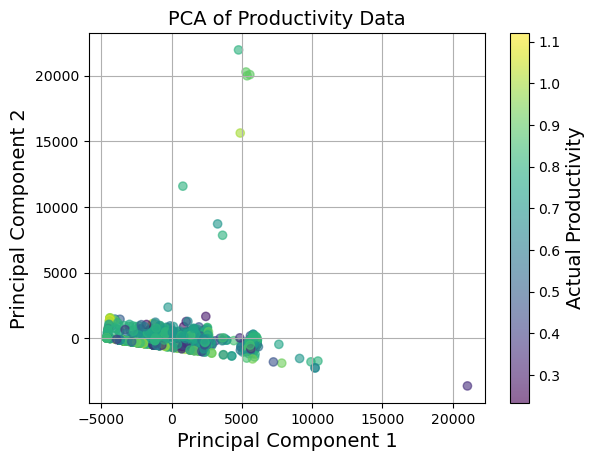

In [81]:
# Importing PCA from the sklearn.decomposition module for dimensionality reduction
from sklearn.decomposition import PCA

# Importing matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Selecting only numeric features from the 'productivity' DataFrame for PCA analysis
# 'select_dtypes' is used to filter columns based on their dtype
# 'dropna(axis=1)' removes columns with any NaN values
numeric_features = productivity.select_dtypes(include=[np.number]).dropna(axis=1)

# Initializing a PCA object to reduce the data to 2 principal components
pca = PCA(n_components=2)

# Fitting the PCA model to the numeric features and transforming the data
# This results in a new dataset with 2 principal components
principal_components = pca.fit_transform(numeric_features)

# Plotting a scatter plot of the first two principal components
# 'principal_components[:, 0]' represents all rows of the first component
# 'principal_components[:, 1]' represents all rows of the second component
# The alpha parameter sets the transparency, and 'c' specifies the color coding by 'actual_productivity'
# 'cmap='viridis'' sets the colormap for different values of 'actual_productivity'
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            alpha=0.6,
            c=productivity['actual_productivity'],
            cmap='viridis')

# Adding a color bar to the plot, labeled 'Actual Productivity'
plt.colorbar(label='Actual Productivity')

# Labeling the x-axis and y-axis with 'Principal Component 1' and 'Principal Component 2' respectively
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Setting the title of the plot as 'PCA of Productivity Data'
plt.title('PCA of Productivity Data')

# Enabling the grid for better readability of the plot
plt.grid(True)

# Displaying the plot
# plt.show() is a function from matplotlib that renders the plot
plt.show()

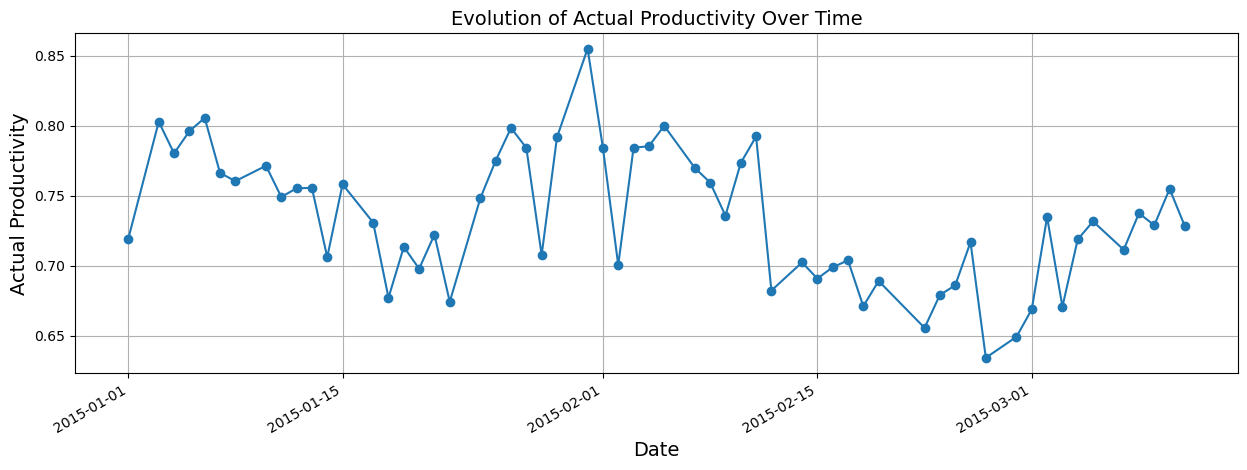

In [80]:
# Converting the 'date' column in the 'productivity' DataFrame to datetime format
# This is necessary for proper handling and sorting of dates
productivity['date'] = pd.to_datetime(productivity['date'])

# Sorting the DataFrame by the 'date' column to ensure chronological order
# 'inplace=True' modifies the original DataFrame rather than returning a new one
productivity.sort_values('date', inplace=True)

# Grouping the data by 'date' and calculating the average 'actual_productivity' for each date
# This step creates a Series where the index is the 'date' and the value is the average productivity
productivity_in_time = productivity.groupby('date')['actual_productivity'].mean()

# Creating a new figure for plotting with a specified size (15 inches wide by 5 inches high)
plt.figure(figsize=(15, 5))

# Plotting the average 'actual_productivity' over time as a line plot
# 'kind='line'' specifies a line plot and 'marker='o'' adds circular markers to each data point
productivity_in_time.plot(kind='line', marker='o')

# Setting the title of the plot and labels for the x and y axes
plt.title('Evolution of Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')

# Enabling the grid for the plot for better readability
plt.grid(True)

# Displaying the plot on the screen
# plt.show() is a function from matplotlib that renders the plot
plt.show()

## Exploring Potential Correlations and Connections

In [38]:
corr_matrix = productivity.corr(numeric_only=True)

In [39]:
corr_matrix["actual_productivity"].sort_values(ascending=False)

actual_productivity      1.000000
targeted_productivity    0.434043
incentive                0.076063
wip                      0.038859
latitude                -0.057002
over_time               -0.063540
longitude               -0.071087
no_of_workers           -0.071866
idle_time               -0.089568
smv                     -0.131432
idle_men                -0.201562
no_of_style_change      -0.218073
Name: actual_productivity, dtype: float64

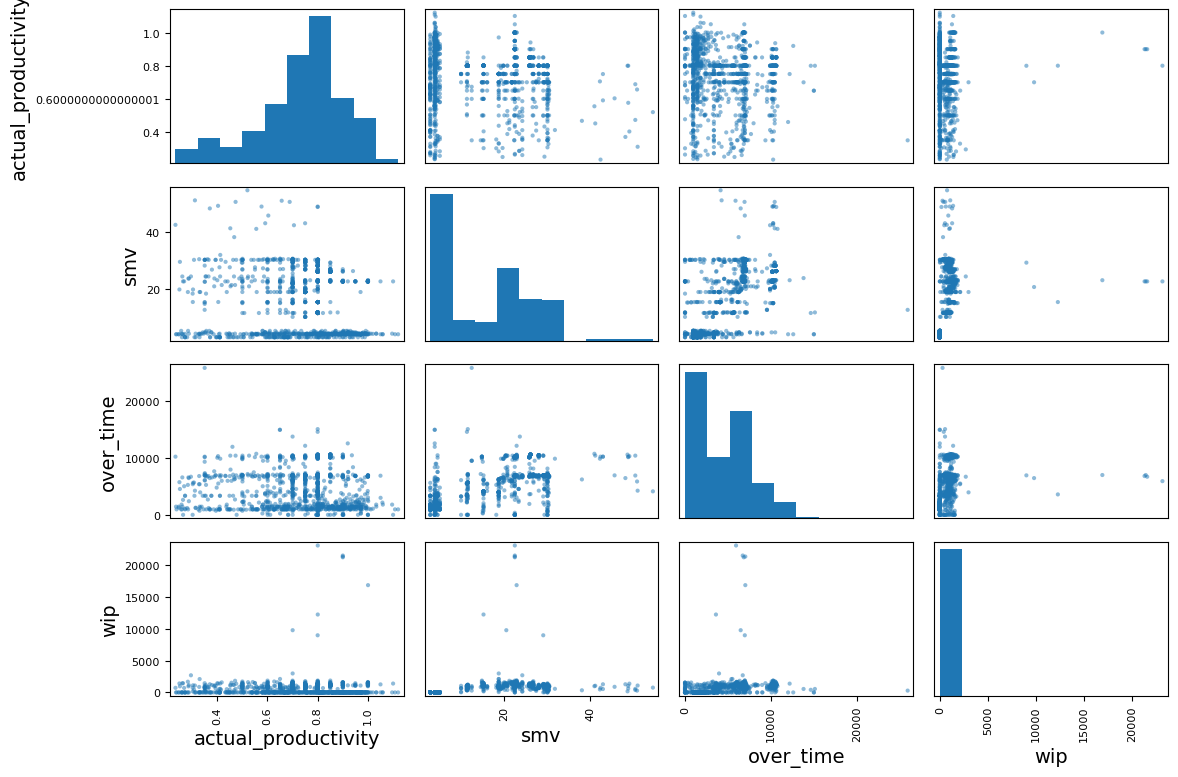

In [73]:
# Import scatter_matrix function from the pandas.plotting module
from pandas.plotting import scatter_matrix

# List of column names that we are interested in for plotting
attributes = ["actual_productivity", "smv", "over_time", "wip"]

# Create a scatter matrix for the specified columns in the 'productivity' DataFrame
# figsize=(12, 8) sets the size of the figure to 12 inches by 8 inches
scatter_matrix(productivity[attributes], figsize=(12, 8))

# Call a function 'save_fig' with the argument "scatter_matrix_plot"
# This line seems to be saving the figure with a specified filename.
# Note: 'save_fig' should be defined elsewhere in the code, it's not a standard Python function
save_fig("scatter_matrix_plot")

# Display the plot on the screen
# plt.show() is a function from the matplotlib library to display the figure
plt.show()

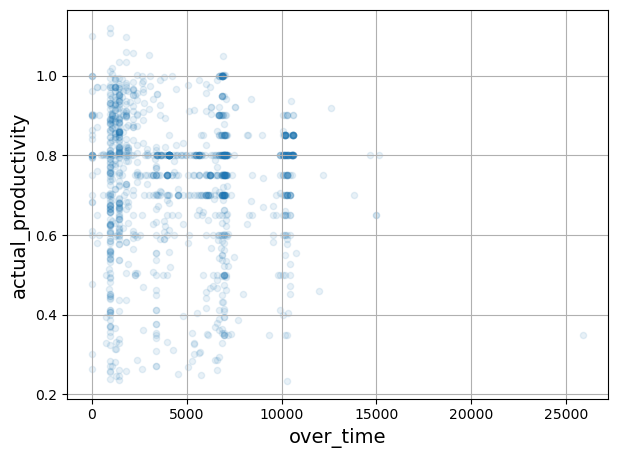

In [74]:
# Creating a scatter plot using the 'productivity' DataFrame
productivity.plot(
    kind="scatter",  # Specifying the plot type as scatter
    x="over_time",   # Setting 'over_time' as the x-axis
    y="actual_productivity",  # Setting 'actual_productivity' as the y-axis
    alpha=0.1,  # Setting the transparency of the points; alpha=0.1 makes points quite transparent
    grid=True  # Enabling the grid for better readability of the plot
)

# Calling the 'save_fig' function to save the generated scatter plot
# This assumes 'save_fig' is a custom function defined elsewhere for saving plots
# The plot is saved with the filename "productivity_vs_overtime_scatterplot"
save_fig("productivity_vs_overtime_scatterplot")

# Displaying the plot on the screen
# plt.show() is a function from the matplotlib library that renders the plot in the output
plt.show()

## Experimenting with Attribute Combinations

In [43]:
productivity["smv_per_worker"] = productivity["smv"] / productivity["no_of_workers"]
productivity["wip_ratio"] = productivity["wip"] / productivity["smv"]
productivity["overtime_per_worker"] = productivity["over_time"] / productivity["no_of_workers"]

In [44]:
corr_matrix = productivity.corr(numeric_only=True)
corr_matrix["actual_productivity"].sort_values(ascending=False)

actual_productivity      1.000000
targeted_productivity    0.434043
incentive                0.076063
wip_ratio                0.040909
wip                      0.038859
overtime_per_worker     -0.042999
latitude                -0.057002
over_time               -0.063540
longitude               -0.071087
no_of_workers           -0.071866
idle_time               -0.089568
smv_per_worker          -0.128110
smv                     -0.131432
idle_men                -0.201562
no_of_style_change      -0.218073
Name: actual_productivity, dtype: float64

## Data Preprocessing for Optimal ML Algorithm Performance

In [25]:
# Separate the target variable (actual_productivity) from the features
productivity_features = productivity.drop('actual_productivity', axis=1)
productivity_labels = productivity['actual_productivity'].copy()

## Data Cleaning

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Let's first create a copy of the original dataset to preserve it
original_productivity = productivity.copy()

# Assuming 'actual_productivity' is the target variable
target = "actual_productivity"
productivity_features = productivity.drop("actual_productivity", axis=1)
productivity_labels = productivity["actual_productivity"].copy()

In [27]:
# Check for null values in the dataset
null_values_count = productivity.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {null_values_count}")

Number of rows with null values: 0


In [28]:
# Drop columns that are not needed for the model (e.g., 'date')
columns_to_drop = ['date']
productivity_features = productivity_features.drop(columns_to_drop, axis=1)

In [29]:
# Fill missing values in 'wip' column with the median
wip_median = productivity_features['wip'].median()
productivity_features['wip'].fillna(wip_median, inplace=True)

In [30]:
# Create an instance of SimpleImputer with the 'median' strategy to fill in missing values
imputer = SimpleImputer(strategy="median")

# Select only the numerical columns from the 'productivity' DataFrame
# This will create a new DataFrame with just the numerical columns
productivity_num = productivity.select_dtypes(include=[np.number])

# Fit the imputer instance to the numerical data
# This calculates the median of each column, which will be used to replace missing values
imputer.fit(productivity_num)

# Access the calculated medians for each column
# These statistics will be used to impute missing values in the dataset
imputer.statistics_

# Access the names of the features that the imputer has been fitted to
# This attribute holds the names of the columns that the imputer is expecting when transforming data
# It is useful for understanding which features are being considered for imputation
imputer.feature_names_in_

array(['team', 'targeted_productivity', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'], dtype=object)

In [31]:
# Define numerical and categorical columns
numerical_cols = productivity_features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = productivity_features.select_dtypes(include=['object']).columns

In [36]:
# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [37]:
# Apply the ColumnTransformer to the features dataset
productivity_prepared = preprocessor.fit_transform(productivity_features)

# To convert it back to a DataFrame:
# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
# Combine with numerical feature names
all_feature_names = list(numerical_cols) + list(cat_feature_names)

In [38]:
# Create the final preprocessed DataFrame
productivity_prepared_df = pd.DataFrame(productivity_prepared, columns=all_feature_names)

productivity_prepared_df.head()  # Show the first 5 rows of the preprocessed DataFrame

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.454323,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.567329,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.320745,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.609552,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.123292,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
from sklearn.ensemble import IsolationForest

# Assuming 'productivity_prepared_df' is the DataFrame after imputation but before scaling and one-hot encoding
X = productivity_prepared_df

# Initialize the IsolationForest model
isolation_forest = IsolationForest(random_state=42)

# Fit the model and predict outliers; -1 for outliers and 1 for inliers
outlier_pred = isolation_forest.fit_predict(X)

# Filter the features DataFrame to exclude outliers
productivity_prepared_df = productivity_prepared_df[outlier_pred == 1]

# Since the index might be affected, reset the index of the filtered DataFrame
productivity_prepared_df.reset_index(drop=True, inplace=True)

# Filter the labels to exclude those corresponding to the outliers
# Make sure that 'productivity_labels' is a Series or a DataFrame with the same index as 'productivity_prepared_df' before filtering
productivity_labels = productivity_labels[outlier_pred == 1]

# Reset the index of the labels as well
productivity_labels.reset_index(drop=True, inplace=True)

In [40]:
productivity_prepared_df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,0.454323,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.567329,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.320745,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.609552,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.123292,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Effective Manipulation of Text & Categorical Features

In [41]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# Identify categorical columns (replace 'ocean_proximity' with actual categorical columns from productivity dataset)
categorical_cols = ['department', 'day', 'quarter']  # Example of categorical columns in the productivity dataset

# For demonstration purposes, let's work with the 'department' column as the categorical feature
# Extract the categorical column from the dataset into a separate DataFrame (similar to housing_cat in the example)
productivity_cat = productivity[['department']]

In [42]:
# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical data with the ordinal encoder
productivity_cat_encoded = ordinal_encoder.fit_transform(productivity_cat)

# Check the encoded categories
print(ordinal_encoder.categories_)

[array(['finishing', 'finishing ', 'sweing'], dtype=object)]


In [43]:
# Now let's demonstrate the one-hot encoding
# Initialize the OneHotEncoder
cat_encoder = OneHotEncoder()

# Fit and transform the categorical data with the one-hot encoder
productivity_cat_1hot = cat_encoder.fit_transform(productivity_cat)

# The one-hot encoding returns a sparse matrix. To view the matrix as an array, use toarray()
productivity_cat_1hot_array = productivity_cat_1hot.toarray()

# If we need to use a dense representation
cat_encoder = OneHotEncoder(sparse_output=False)
productivity_cat_1hot = cat_encoder.fit_transform(productivity_cat)

In [44]:
# Check the one-hot encoded categories
print(cat_encoder.categories_)

[array(['finishing', 'finishing ', 'sweing'], dtype=object)]


In [45]:
# Assuming `productivity_cat` is the DataFrame containing the categorical column 'department'
# Strip leading and trailing whitespaces from the categorical column
productivity_cat['department'] = productivity_cat['department'].str.strip()

# Optionally, convert to consistent casing (e.g., all lower case)
productivity_cat['department'] = productivity_cat['department'].str.lower()

# Check unique categories after cleaning
print(productivity_cat['department'].unique())

# Proceed with one-hot encoding
cat_encoder = OneHotEncoder()
productivity_cat_1hot = cat_encoder.fit_transform(productivity_cat)

# Check the one-hot encoded categories
print(cat_encoder.categories_)

['sweing' 'finishing']
[array(['finishing', 'sweing'], dtype=object)]


C:\Users\mehri\AppData\Local\Temp\ipykernel_18320\3452173377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productivity_cat['department'] = productivity_cat['department'].str.strip()
C:\Users\mehri\AppData\Local\Temp\ipykernel_18320\3452173377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productivity_cat['department'] = productivity_cat['department'].str.lower()


In [46]:
productivity_cat_encoded[:8]

array([[2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [47]:
# Assuming 'productivity_cat' is the categorical part of your data and 'cat_encoder' is your OneHotEncoder instance
productivity_cat_1hot = cat_encoder.fit_transform(productivity_cat)

In [48]:
productivity_cat_1hot

<1197x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1197 stored elements in Compressed Sparse Row format>

In [49]:
# Now, get the feature names directly from the fitted encoder
feature_names = cat_encoder.get_feature_names_out()

# Then, create the DataFrame using these feature names
productivity_cat_1hot_df = pd.DataFrame(productivity_cat_1hot.toarray(), columns=feature_names)

# Finally, display the head of the DataFrame to check
productivity_cat_1hot_df.head()

,department_finishing,department_sweing
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [50]:
cat_encoder.feature_names_in_

array(['department'], dtype=object)

In [51]:
cat_encoder.get_feature_names_out()

array(['department_finishing', 'department_sweing'], dtype=object)

In [52]:
# Create a new DataFrame `df_test_unknown` with categorical data that you want to encode.
# This DataFrame should have the same structure as `productivity_cat` which was used to fit the encoder.
# For the purpose of demonstration, let's copy the original categorical data and pretend it's new data.
df_test_unknown = productivity_cat.copy()

# Transform the new categorical data using the previously fitted OneHotEncoder
# Note that toarray() is not needed as we're not converting a sparse matrix to a dense one.
encoded_test_data = cat_encoder.transform(df_test_unknown)

In [53]:
# Sample data to fit the OneHotEncoder
productivity_cat = pd.DataFrame({
    "department": ["finishing", "sweing", "finishing ", "sweing"],
    "day": ["Monday", "Tuesday", "Thursday", "Friday"],
    "quarter": ["Quarter1", "Quarter2", "Quarter3", "Quarter4"]
})

# Initialize and fit the OneHotEncoder with the sample data
cat_encoder = OneHotEncoder()
cat_encoder.fit(productivity_cat)

# Create df_test_unknown with a new category not seen during fitting
df_test_unknown = pd.DataFrame({
    "department": ["finishing", "ISLAND"],  # Assuming 'ISLAND' is an unknown category for demonstration
    "day": ["Thursday", "Friday"],  # Using known categories for other features
    "quarter": ["Q1", "Q2"]
})

# Configure the encoder to ignore unknown categories
cat_encoder.handle_unknown = "ignore"

# Transform the test data using the previously fitted encoder
encoded_test_data = cat_encoder.transform(df_test_unknown)

# Create a DataFrame from the encoded data using the feature names from the encoder
feature_names = cat_encoder.get_feature_names_out(productivity_cat.columns)
df_output = pd.DataFrame(encoded_test_data.toarray(), columns=feature_names, index=df_test_unknown.index)

# Display the output DataFrame
df_output

,department_finishing,department_finishing,department_sweing,day_Friday,day_Monday,day_Thursday,day_Tuesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling for Enhanced Model Performance

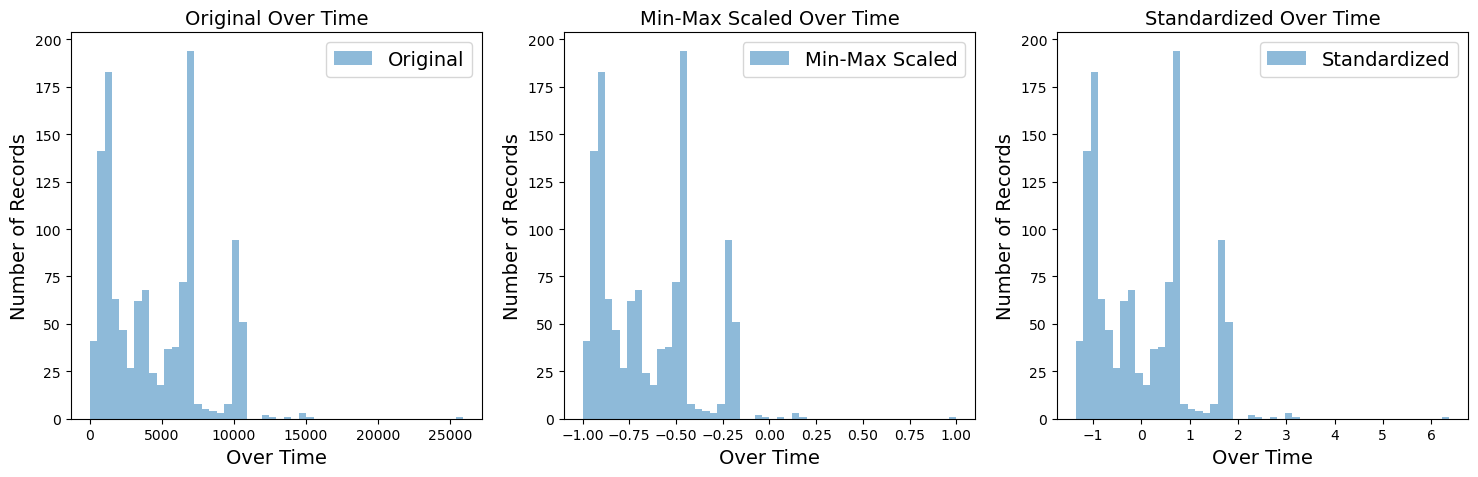

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns to scale
numerical_cols = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers']  # example numerical columns

# Extract numerical data for scaling
productivity_num = productivity[numerical_cols]

# Initialize the MinMaxScaler and StandardScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
std_scaler = StandardScaler()

# Scale the numerical data using MinMaxScaler
productivity_num_min_max_scaled = min_max_scaler.fit_transform(productivity_num)

# Scale the numerical data using StandardScaler
productivity_num_std_scaled = std_scaler.fit_transform(productivity_num)

# For visualization, let's take one feature, 'over_time', and plot its original and scaled distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data distribution
axes[0].hist(productivity['over_time'], bins=50, alpha=0.5, label='Original')
axes[0].set_title('Original Over Time')

# Min-Max scaled data
axes[1].hist(productivity_num_min_max_scaled[:, numerical_cols.index('over_time')], bins=50, alpha=0.5, label='Min-Max Scaled')
axes[1].set_title('Min-Max Scaled Over Time')

# Standardized data
axes[2].hist(productivity_num_std_scaled[:, numerical_cols.index('over_time')], bins=50, alpha=0.5, label='Standardized')
axes[2].set_title('Standardized Over Time')

# Adding labels
for ax in axes:
    ax.set_xlabel('Over Time')
    ax.set_ylabel('Number of Records')
    ax.legend()

plt.tight_layout()
plt.show()

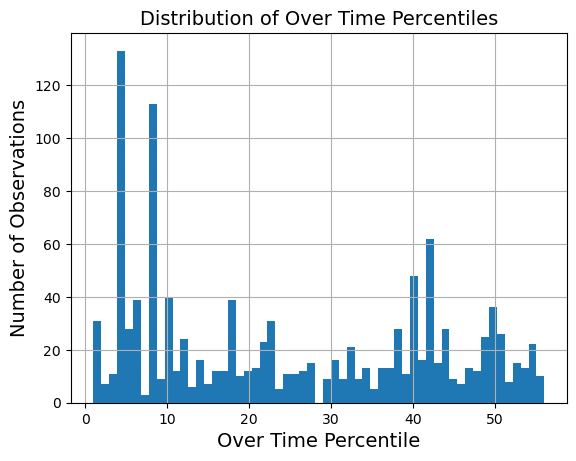

In [55]:
# Removing rows from the 'productivity_data' DataFrame where 'over_time' column has NaN (Not a Number) values
productivity.dropna(subset=['over_time'], inplace=True)

# Calculating the percentiles (1st to 99th) of the 'over_time' column in the 'productivity_data' DataFrame
# Ensuring that each calculated percentile is unique by using np.unique
percentiles = list(np.unique([np.percentile(productivity['over_time'], p) for p in range(1, 100)]))

# Checking if the smallest percentile is greater than the actual minimum value of 'over_time'
# If true, insert the minimum value at the beginning of the percentiles list
min_over_time = productivity['over_time'].min()
if min_over_time < percentiles[0]:
    percentiles.insert(0, min_over_time)

# Checking if the largest percentile is smaller than the actual maximum value of 'over_time'
# If true, append the maximum value at the end of the percentiles list
max_over_time = productivity['over_time'].max()
if max_over_time > percentiles[-1]:
    percentiles.append(max_over_time)

# Creating a list of bins for categorizing 'over_time' values into percentiles
# Adding '-np.inf' and 'np.inf' to cover all possible 'over_time' values
# Removing duplicates and sorting the bins for proper categorization
bins = [-np.inf] + percentiles + [np.inf]
bins = sorted(set(bins))

# Categorizing 'over_time' values into percentile bins, and creating a new column 'over_time_percentile' in 'productivity_data'
# Using 'pd.cut' to assign each 'over_time' value to a percentile bin
# The number of labels should be one less than the number of bins, hence len(bins) - 1
productivity['over_time_percentile'] = pd.cut(
    productivity['over_time'], 
    bins=bins, 
    labels=range(1, len(bins)),  
    duplicates='drop' 
)

# Plotting a histogram of the 'over_time_percentile' to visualize the distribution of 'over_time' values across percentiles
# Setting the number of bins in the histogram to be one less than the total number of bins in 'bins'
productivity['over_time_percentile'].hist(bins=len(bins) - 1)
plt.xlabel("Over Time Percentile")  # Label for the x-axis
plt.ylabel("Number of Observations")  # Label for the y-axis
plt.title("Distribution of Over Time Percentiles")  # Title of the histogram
plt.show()  # Displaying the plot

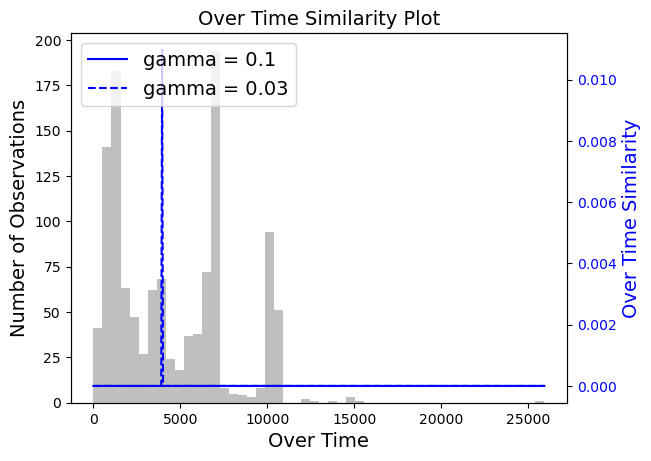

In [56]:
from sklearn.metrics.pairwise import rbf_kernel

# Calculate similarity using RBF kernel on 'over_time' with respect to its median value
over_time_median = productivity["over_time"].median()
over_time_simil = rbf_kernel(productivity[["over_time"]], [[over_time_median]], gamma=0.1)

# Generate a range of Over Time values for the x-axis of the plot
over_time_range = np.linspace(productivity["over_time"].min(), productivity["over_time"].max(), 500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(over_time_range, [[over_time_median]], gamma=gamma1)
rbf2 = rbf_kernel(over_time_range, [[over_time_median]], gamma=gamma2)

# Plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel("Over Time")
ax1.set_ylabel("Number of Observations")
ax1.hist(productivity["over_time"], bins=50, color='grey', alpha=0.5)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(over_time_range, rbf1, color=color, label=f"gamma = {gamma1}")
ax2.plot(over_time_range, rbf2, color=color, label=f"gamma = {gamma2}", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Over Time Similarity", color=color)

plt.legend(loc="upper left")
plt.title("Over Time Similarity Plot")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


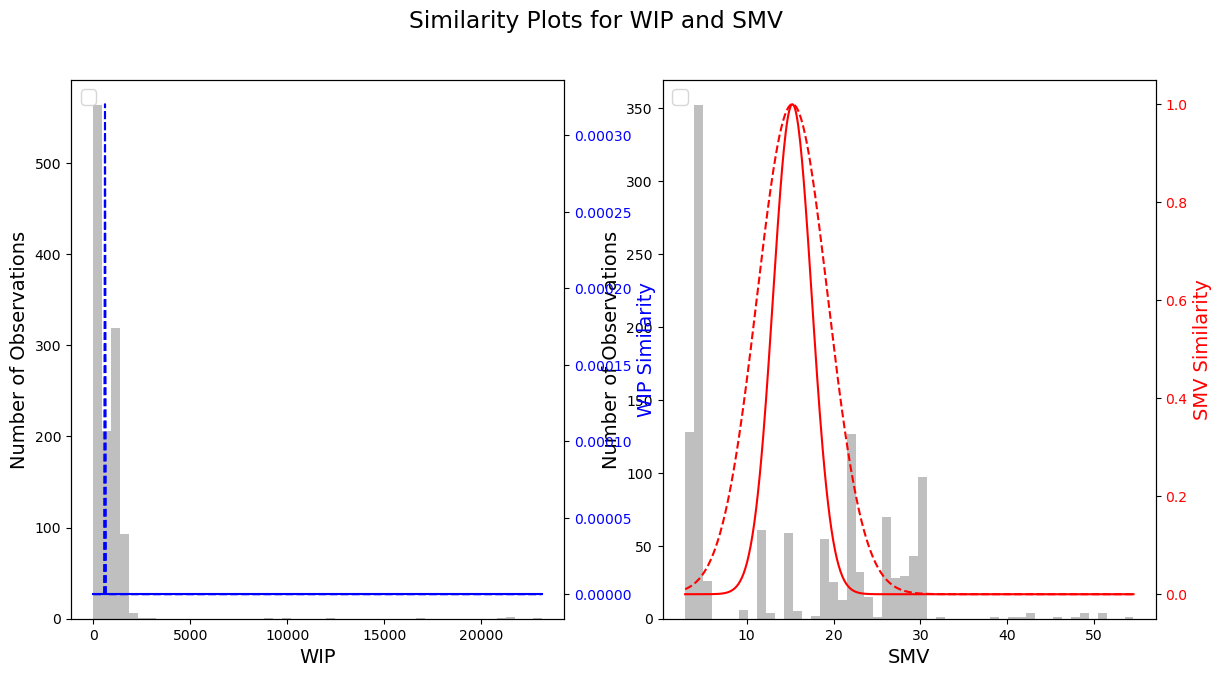

In [57]:
from sklearn.metrics.pairwise import rbf_kernel

# Ensure no NaN values in 'wip' and 'smv', or handle them appropriately
productivity.dropna(subset=['wip', 'smv'], inplace=True)

# Calculate median values for 'wip' and 'smv'
wip_median = productivity['wip'].median()
smv_median = productivity['smv'].median()

# Calculate similarity using RBF kernel on 'wip' and 'smv' with respect to their median values
wip_simil = rbf_kernel(productivity[['wip']], [[wip_median]], gamma=0.1)
smv_simil = rbf_kernel(productivity[['smv']], [[smv_median]], gamma=0.1)

# Generate ranges for 'wip' and 'smv' values
wip_range = np.linspace(productivity['wip'].min(), productivity['wip'].max(), 500).reshape(-1, 1)
smv_range = np.linspace(productivity['smv'].min(), productivity['smv'].max(), 500).reshape(-1, 1)

# Define gamma values for the RBF kernel
gamma1 = 0.1
gamma2 = 0.03

# Calculate RBF kernel similarity for different gamma values
wip_rbf1 = rbf_kernel(wip_range, [[wip_median]], gamma=gamma1)
wip_rbf2 = rbf_kernel(wip_range, [[wip_median]], gamma=gamma2)
smv_rbf1 = rbf_kernel(smv_range, [[smv_median]], gamma=gamma1)
smv_rbf2 = rbf_kernel(smv_range, [[smv_median]], gamma=gamma2)

# Create subplots for 'wip' and 'smv'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot for 'wip'
ax1.set_xlabel('WIP')
ax1.set_ylabel('Number of Observations')
ax1.hist(productivity['wip'], bins=50, color='grey', alpha=0.5)
ax1_twin = ax1.twinx()
ax1_twin.plot(wip_range, wip_rbf1, color='blue', label='gamma = 0.10')
ax1_twin.plot(wip_range, wip_rbf2, color='blue', label='gamma = 0.03', linestyle='--')
ax1_twin.set_ylabel('WIP Similarity', color='blue')
ax1_twin.tick_params(axis='y', labelcolor='blue')

# Plot for 'smv'
ax2.set_xlabel('SMV')
ax2.set_ylabel('Number of Observations')
ax2.hist(productivity['smv'], bins=50, color='grey', alpha=0.5)
ax2_twin = ax2.twinx()
ax2_twin.plot(smv_range, smv_rbf1, color='red', label='gamma = 0.10')
ax2_twin.plot(smv_range, smv_rbf2, color='red', label='gamma = 0.03', linestyle='--')
ax2_twin.set_ylabel('SMV Similarity', color='red')
ax2_twin.tick_params(axis='y', labelcolor='red')

# Add legend and title to the plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
fig.suptitle('Similarity Plots for WIP and SMV')

# Show the plots
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'productivity_data' is your DataFrame with relevant data.

# Scale the target variable 'productivity'
target_scaler = StandardScaler()
scaled_productivity = target_scaler.fit_transform(productivity[['actual_productivity']].values)

# Create a linear regression model
model = LinearRegression()

# Fit the model using the 'over_time' feature as input and scaled 'productivity' as the target
model.fit(productivity[['over_time']], scaled_productivity)

# Pretend this is new data
some_new_data = productivity[['over_time']].iloc[:5]

# Predict productivity for the new data
scaled_predictions = model.predict(some_new_data)

# Inverse transform the scaled predictions to get the actual productivity values
predictions = target_scaler.inverse_transform(scaled_predictions)

In [59]:
predictions

array([[0.7279948 ],
       [0.74527984],
       [0.73765409],
       [0.73765409],
       [0.74256846]])

In [60]:
from sklearn.compose import TransformedTargetRegressor

# Assuming 'productivity_data' is your DataFrame with relevant data.

# Create a TransformedTargetRegressor with LinearRegression as the base estimator and StandardScaler as the transformer
model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=StandardScaler()
)

# Fit the model using the 'over_time' feature as input and 'productivity' as the target
model.fit(productivity[['over_time']], productivity['actual_productivity'])

# Pretend this is new data
some_new_data = productivity[['over_time']].iloc[:5]

# Predict 'productivity' for the new data
predictions = model.predict(some_new_data)

In [61]:
predictions

array([0.7279948 , 0.74527984, 0.73765409, 0.73765409, 0.74256846])

## Custom Transformers

In [62]:
from sklearn.preprocessing import FunctionTransformer

# Function to apply log transformation and inverse transformation
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_smv = log_transformer.transform(productivity[["smv"]])

# Function to apply radial basis function (RBF) kernel transformation
def rbf_kernel(X, Y, gamma=0.1):
    return np.exp(-gamma * np.sum((X[:, np.newaxis] - Y) ** 2, axis=2))

In [63]:
# Function to apply RBF kernel transformation
def rbf_kernel_transform(X, Y=[0.75, 0.676667], gamma=0.1):
    return np.exp(-gamma * np.sum((X - Y) ** 2, axis=1))

# Apply RBF kernel transformation to 'targeted_productivity' and 'actual_productivity' columns
sf_simil = rbf_kernel_transform(productivity[["targeted_productivity", "actual_productivity"]])

In [64]:
sf_simil

0       0.992803
1       0.995607
2       0.998216
3       0.998216
4       0.998221
          ...   
1192    0.999766
1193    0.999490
1194    0.998740
1195    0.997088
1196    0.991834
Length: 1197, dtype: float64

In [65]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# Assuming you have imported the necessary libraries and classes as shown above

# Create instances of StandardScalerClone and ClusterSimilarity
scaler = StandardScalerClone()
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Fit and transform the data
X_scaled = scaler.fit_transform(productivity[["targeted_productivity", "actual_productivity"]])
similarities = cluster_simil.fit_transform(X_scaled)

C:\Users\mehri\ana\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [67]:
similarities[:3].round(2)

array([[0.16, 0.99, 0.01, 0.  , 0.  , 0.04, 0.  , 0.  , 0.26, 0.57],
       [0.5 , 0.77, 0.09, 0.  , 0.  , 0.09, 0.  , 0.  , 0.63, 0.64],
       [0.11, 0.5 , 0.1 , 0.  , 0.  , 0.37, 0.  , 0.  , 0.65, 1.  ]])

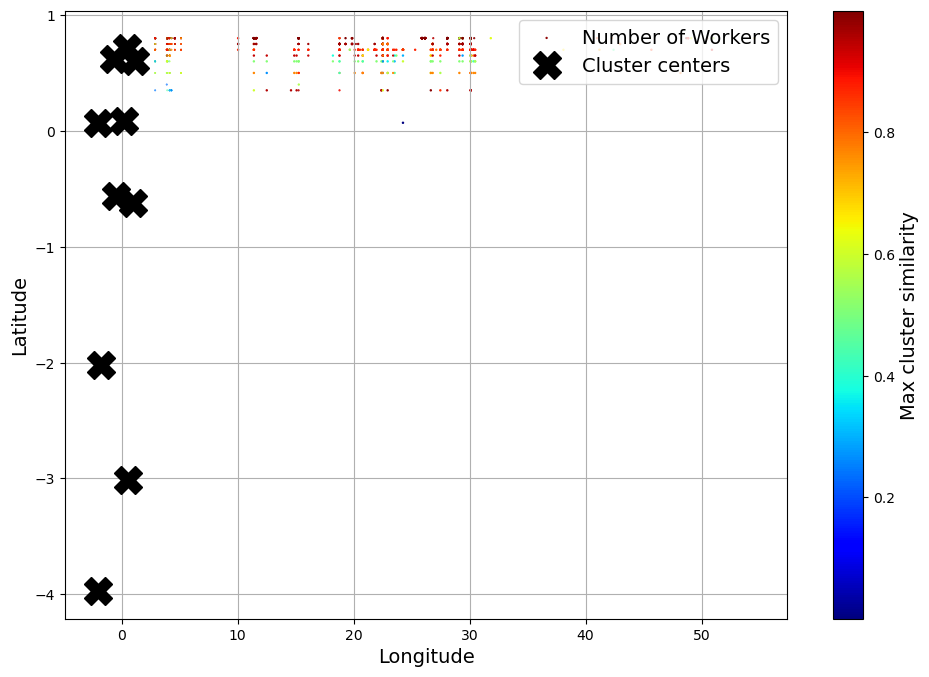

In [68]:
import matplotlib.pyplot as plt
productivity_renamed = productivity.rename(columns={
    "targeted_productivity": "Latitude", "smv": "Longitude",
    "no_of_workers": "Number of Workers",
    "incentive": "Incentive Amount (BDT)"})
productivity_renamed["Max cluster similarity"] = similarities.max(axis=1)

productivity_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=productivity_renamed["Number of Workers"] / 100, label="Number of Workers",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

In [69]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [70]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [71]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [72]:
productivity_num_prepared = num_pipeline.fit_transform(productivity_num)
productivity_num_prepared[:2].round(2)

array([[ 1.01,  0.28,  0.75,  0.37, -0.06,  1.1 ],
       [-1.02, -0.45, -1.08, -0.24, -0.06, -1.2 ]])

In [73]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [74]:
df_productivity_num_prepared = pd.DataFrame(
    productivity_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=productivity_num.index)

In [75]:
df_productivity_num_prepared.head(2)  # extra code

,smv,wip,over_time,incentive,idle_time,no_of_workers
0,1.014552,0.277930,0.750589,0.373414,-0.057473,1.099229
1,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-1.199268


In [76]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [77]:
num_pipeline[1]

StandardScaler()

In [78]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [79]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [80]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [81]:
from sklearn.compose import ColumnTransformer

num_attribs = ["targeted_productivity", "smv", "wip", "idle_time",
               "idle_time", "no_of_workers", "no_of_style_change", "over_time"]
cat_attribs = ["department"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [82]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [83]:
productivity_prepared = preprocessing.fit_transform(productivity)

In [84]:
from sklearn.compose import ColumnTransformer

In [85]:
def column_ratio(X):
    return X[:, 0] / X[:, 1]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler())

# Assuming cat_pipeline is defined elsewhere for handling categorical columns
# cat_pipeline = ...

preprocessing = ColumnTransformer([
        ("worker_overtime_ratio", ratio_pipeline(), ["no_of_workers", "over_time"]),
        ("incentive_overtime_ratio", ratio_pipeline(), ["incentive", "over_time"]),
        ("log_transform", log_pipeline, ["over_time", "incentive", "no_of_workers"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object))
    ],
    remainder="passthrough")  # Pass through other columns as is

In [86]:
productivity_prepared.shape

(1197, 81)

## Model Selection & Training

#### Training and Evaluating on the Training Set

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Exclude 'actual_productivity' from the feature columns
X = productivity.drop(columns=['actual_productivity'])
y = productivity['actual_productivity']

In [88]:
# Create a preprocessing pipeline
preprocessing = ColumnTransformer(
    remainder=Pipeline(steps=[
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('standardscaler', StandardScaler())
    ]),
    transformers=[
        ('numeric_features', Pipeline(steps=[
            ('simpleimputer', SimpleImputer(strategy='median')),
        ]), ['no_of_workers', 'no_of_style_change', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men']),
        ('categorical_features', Pipeline(steps=[
            ('simpleimputer', SimpleImputer(strategy='most_frequent')),
            ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['date', 'day', 'quarter', 'department'])
    ]
)

In [89]:
# Create a Linear Regression model pipeline
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['no_of_workers',
                                                   'no_of_style_change', 'smv',
                                                   'wip', 'over_time',
                                                   'incentive', 'idle_time',
                                                   'idle_men']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['date', 'day', 'quarter',
                                                   'department'])])),
                ('linearregression', LinearRegression())])

In [90]:
# Make predictions with the Linear Regression model
productivity_predictions = lin_reg.predict(productivity)

In [92]:
# Compute RMSE for Linear Regression
lin_rmse = mean_squared_error(y, productivity_predictions, squared=False)
print("Linear Regression RMSE:", lin_rmse)

Linear Regression RMSE: 0.14164069277512345


In [94]:
# Create a Decision Tree Regressor model pipeline
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(productivity, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['no_of_workers',
                                                   'no_of_style_change', 'smv',
                                                   'wip', 'over_time',
                                                   'incentive', 'idle_time',
                                                   'idle_men']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['date', 'day', 'quarter',
                                                   'department'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [95]:
# Make predictions with the Decision Tree Regressor model
productivity_predictions_tree = tree_reg.predict(productivity)

In [96]:
# Compute RMSE for Decision Tree Regressor
tree_rmse = mean_squared_error(y, productivity_predictions_tree, squared=False)
print("Decision Tree Regressor RMSE:", tree_rmse)

Decision Tree Regressor RMSE: 5.474061207380245e-17


## Enhanced Evaluation Using Cross-Validation

In [124]:
from sklearn.model_selection import cross_val_score

# Linear Regression cross-validation
lin_reg_cv_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10)
lin_reg_cv_rmse = np.sqrt(-lin_reg_cv_scores)
print("Linear Regression CV RMSE Scores:", lin_reg_cv_rmse)
print("Linear Regression CV RMSE Mean:", lin_reg_cv_rmse.mean())

In [ ]:
# Decision Tree Regressor cross-validation
tree_reg_cv_scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv=10)
tree_reg_cv_rmse = np.sqrt(-tree_reg_cv_scores)
print("\nDecision Tree Regressor CV RMSE Scores:", tree_reg_cv_rmse)
print("Decision Tree Regressor CV RMSE Mean:", tree_reg_cv_rmse.mean())

## Model Fine-Tuning

#### Grid Search

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search over
param_grid = {
    'preprocessing__num__imputer__strategy': ['mean', 'median'],
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_features': ['auto', 'sqrt', 'log2'],
    'random_forest__max_depth': [None, 10, 20, 30]
}

In [128]:
# Instantiate the grid search
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
# Assume X is your feature matrix and y is the target vector for productivity
grid_search.fit(X, y)

In [ ]:
# Best model after fine-tuning
best_model = grid_search.best_estimator_

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

#### Randomized Search

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the feature transformation:
numerical_features = ['no_of_workers', 'no_of_style_change', 'over_time', 'incentive']
categorical_features = ['department', 'day']

In [133]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [134]:
# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

In [135]:
# Define the parameter distribution for the randomized search
param_dist = {
    'model__n_estimators': randint(low=100, high=500),
    'model__max_depth': randint(low=3, high=20),
}

In [136]:
# Perform the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds in cross-validation
    scoring='neg_mean_squared_error',
    random_state=42
)

In [ ]:
# Assume X_train and y_train are your features and target variable
random_search.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validated RMSE: ", np.sqrt(-random_search.best_score_))

## Analyzing the Best Models & their Errors

In [ ]:
# Assuming rnd_search is your completed randomized search from the productivity use case
final_model = rnd_search.best_estimator_

In [ ]:
# Assuming 'random_forest' is the name of the RandomForestRegressor step in your pipeline
feature_importances = final_model['random_forest'].feature_importances_
feature_importances_rounded = feature_importances.round(2)

In [ ]:
# Getting feature names from the ColumnTransformer in your pipeline
feature_names = final_model.named_steps['preprocessing'].get_feature_names_out()

# Combining feature importances with their corresponding feature names
features_and_importances = sorted(zip(feature_importances_rounded, feature_names), reverse=True)

In [ ]:
# Displaying the sorted feature importances
for importance, name in features_and_importances:
    print(f"{name}: {importance}")